# Linear Regression

## 1. Giới thiệu
Linear Regression (Hồi quy tuyến tính), thật toán cực đơn giản, để hiểu Linear regression là gì chỉ cần phân tích từng khái niệm bên trong tên của thuật toán là ra ngay ấy mà.  

Linear Regression = Linear + Regression (:V)  

Linear (Tuyến tính) được dùng để nói đến một mối quan hệ toán học hoặc hàm có thể được biểu diễn trên đồ thị là một đường thằng, mặt phẳng. Trong không gian 2 chiều đồ thị hàm số được biểu diện là một đường thẳng, trong không gian 3 chiều là một mặt phẳng và trong các không gian lớn hơn là một siêu mặt phẳng (Hyperplane).  

Regression (Hồi quy) là một phương pháp thống kê giúp tìm ra giá trị kỳ vọng (label) dựa vào điều kiện đầu vào là các biến ngẫu nhiên. 

Hồi quy tuyến tính là cách thức mô hình hóa mối quan hệ tuyến tính giữa các dữ liệu rời rạc đầu vào. Mục đích của giải thuật là dự đoán giá trị của biến liên tục $\mathcal{t}$ dựa trên giá trị của vector đầu vào $\textbf{x}$.  

Về phân loại giải thuật thì hồi quy tuyến tính là một giải thuật học có giám sát, do thuật toán được train dựa trên dữ liệu được gán nhãn.  

## 2. Cách thức thuật toán hoạt động

### 2.1 Công thức cho Linear Regression model

Công thức toán học:  
<br/>

<center>
$
\begin{equation}
t = h(x) + \epsilon
\end{equation}
$
</center>
<br/>

$\textbf{Trong đó:}$  
* $t$ là vector cột $\begin{equation} \textbf{t} = [t_1; t_2; ...; t_n]^T \end{equation}$, là vector nhãn có sẵn.
* $\mathcal{h(x)}$ là hàm quan hệ tuyến tính giữa vector $\textbf{x}$ và vector nhãn $\textbf{t}$. Đây là hàm ta chưa biết cần được phục hồi từ dữ liệu {input, label}.
* $\epsilon$ là nhiễu của bài toán, tuân theo phân phối chuẩn, có giá trị trung bình là 0 và độ lệch chuẩn là $\sigma$, $\begin{equation} \mathcal{N}(0,\sigma^2) \end{equation}$.  
<br/>

Trong Linear regression, hàm $\mathcal{h(x)}$ được xấp xỉ như sau:  
<br/>
$
\begin{equation*}
h(x) \sim \mathcal{y}(\textbf{x}, \textbf{w}) = \widehat{y} = w_0x_0 + w_1x_1 + ... + w_{(D - 1)}x_{(D - 1)} = \textbf{w}^T\overline{\textbf{x}}
\end{equation*}
$  
<br/>
Trong đó, $\overline{\textbf{x}}$ (x bar) là vector dữ liệu đầu vào mở rộng với giá trị $x_0$ là 1.

Tới đây thì việc ta cần làm tiếp theo là tìm thằng vector $\textbf{w}$ cho hàm $\mathcal{h(x)}$.<br/>
Nguyên tắc chung để tìm nghiệm cho phương trình gồm 2 bước:
* Đưa bài toán về dạng tìm nghiệm tối ưu của hàm nào đó.
* Giải bài toán tối ưu đó.

### 2.3 Tìm nghiệm bằng công thức toán học

Có 2 cách để tìm nghiệm cho mô hình Linear regression:  
* Phân tích toán học $\rightarrow$ công thức nghiệm.
* Sử dụng phương pháp lập giảm theo đạo hàm (Gradient Descent).  

Trong bài này sử dụng phương pháp phân tích toán học.  
Vì sao?  

Sử dụng phương pháp cực đại hóa hàm hợp lý (Maximum likelihood function) ta có được công thức của hàm Negative log-likelihood function (NLL):

$
\begin{equation}
\mathcal{L}
\end{equation}
$

Hạn chế của tìm nghiệm bằng công thức toán học là nếu số lượng điểm dữ liệu nhiều và liên tục thì khó khăng trong tính toán.





## Hiện thực giải thuật bằng Python
Sau một nhàu thứ ngán ngẫm lý thuyết, giờ thì mần với code thôi!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

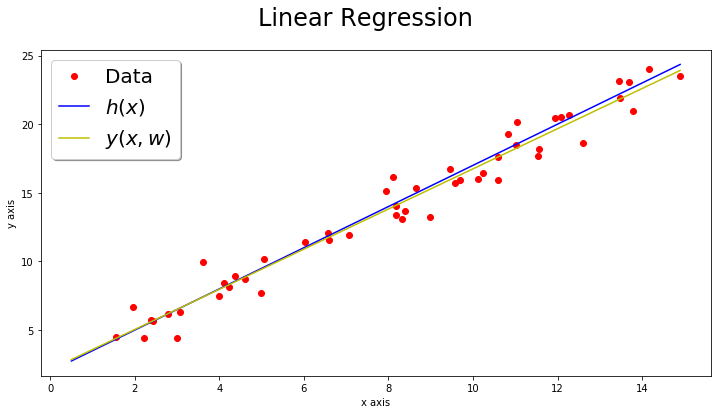

In [2]:
"""Number of input dataNumber of input data"""
N = 50

"""Function h(x)"""
hx_func = lambda x: 2 + (1.5 * x)

"""Generate X"""
X = np.random.uniform(low = .5, high = 15, size = (N, 1))

"""Generate X_bar"""
one = np.ones((X.shape[0], 1))
X_bar = np.concatenate((one, X), axis = 1)

"""Calculate t"""
t = hx_func(X) + np.random.normal(0, 1, X.shape)

"""Calculate w from equation: w = (X^T.X)^-1.X^T.t"""
w = np.dot(np.linalg.pinv(np.dot(X_bar.T, X_bar)), np.dot(X_bar.T, t))

"""Plot input data"""
plt.figure(figsize=(12, 6))
plt.plot(X, t, 'ro')

"""Plot original function"""
x_plt = np.arange(0.5, 15, 0.1)
plt.plot(x_plt, hx_func(x_plt), 'b')

"""Plot function with value of w"""
fw_func = lambda X, w: w[0] + (w[1] * X)
plt.plot(x_plt, fw_func(x_plt, w), 'y')

"""Show figure"""
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.suptitle('Linear Regression', fontsize=24)
plt.legend(('Data', r'$h(x)$', r'$y(x, w)$'),
           shadow=True, loc=2, handlelength=1.5, fontsize=20)
plt.show()